In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from matplotlib import pyplot as plt

In [2]:
from tensorflow.keras.datasets import mnist
(train_x,train_y),( test_x, test_y)= mnist.load_data()

In [3]:
train_x.shape ,train_y.shape

((60000, 28, 28), (60000,))

In [4]:
import numpy as np
ab= np.where(train_y == 5)
sam=train_x[ab]

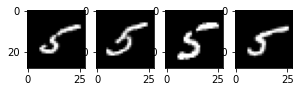

In [5]:
for i in range(1,5):
    ax=plt.subplot(1,5, i)
    ax.imshow(sam[i], cmap="gray")


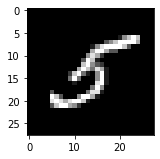

In [6]:
plt.figure(figsize=(5,5))
ax=plt.subplot(1,2,1)
ax.imshow(sam[2], cmap="gray")

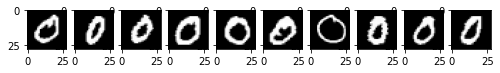

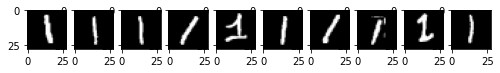

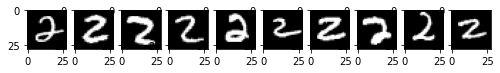

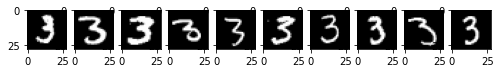

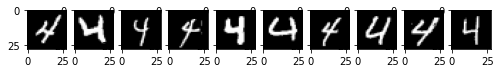

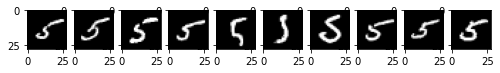

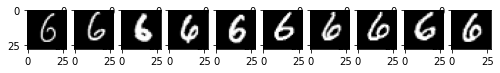

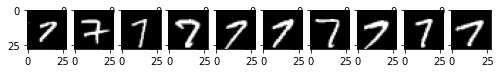

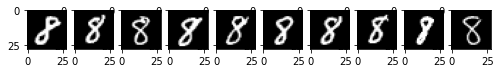

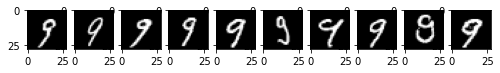

In [7]:
for i in range(0,10):
    ind=np.where(train_y == i)
    samp= train_x[ind]
    plt.figure(figsize=(10,10))
    for j in range(1,11):
        ax=plt.subplot(1,12,j)
        ax.imshow(samp[j], cmap="gray")

In [8]:
train_x , test_x =train_x.reshape(-1,28,28,1) , test_x.reshape(-1,28,28,1)
train_x.shape , test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
from tensorflow.keras.utils import to_categorical
train_y_enc, test_y_enc =to_categorical(train_y), to_categorical(test_y)


In [10]:
train_y_enc.shape, test_y_enc.shape

((60000, 10), (10000, 10))

In [17]:
from keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3) ,activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(64, kernel_size=(3,3) ,activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.compile(optimizer= SGD(0.01) , loss="categorical_crossentropy", metrics="accuracy")

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [19]:
history =model.fit(train_x, train_y_enc, validation_data=(test_x, test_y_enc), epochs=10, batch_size=32)

Epoch 1/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.7286 - accuracy: 0.8970 - val_loss: 0.1198 - val_accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1456 - accuracy: 0.9547 - val_loss: 0.0779 - val_accuracy: 0.9747
Epoch 3/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.1040 - accuracy: 0.9677 - val_loss: 0.0649 - val_accuracy: 0.9797
Epoch 4/10
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0853 - accuracy: 0.9731 - val_loss: 0.0654 - val_accuracy: 0.9787
Epoch 5/10
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0735 - accuracy: 0.9759 - val_loss: 0.0556 - val_accuracy: 0.9831
Epoch 6/10
1875/1875 [==============================] - 389s 207ms/step - loss: 0.0604 - accuracy: 0.9805 - val_loss: 0.0531 - val_accuracy: 0.9835
Epoch 7/10
1875/1875 [==============================] - 55s 29ms/step - loss: 0.0532 - accuracy: 0.9825 - val_loss: 0.0509

In [20]:
key=history.history.keys()

In [21]:
for i in key:
    print(i, history.history[i][-1])

loss 0.038645584136247635
accuracy 0.9867166876792908
val_loss 0.049217045307159424
val_accuracy 0.9843999743461609


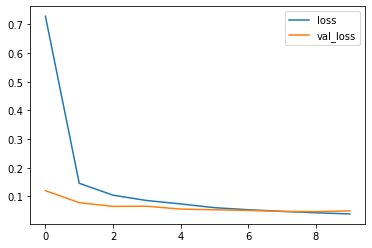

In [22]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")

plt.legend();

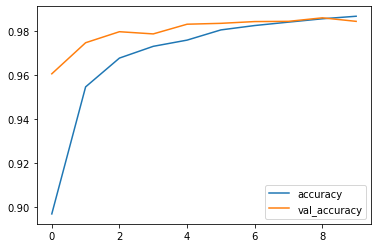

In [24]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend();